## ML. Classification

### Diabetes dataset

As with the Regression, we will use one standard dataset on which we will explore the core concepts. However, nothing prevents us from training the same models on other data, e.g., for the prediction of positive vs. negative emotions based on characteristics of physiological signals.

Today, we will use the **Diabetes** dataset (exactly: "Pima Indians Diabetes Database"), prepared by National Institute of Diabetes and Digestive and Kidney Diseases in 1990 (a classical dataset used by many machine learning tutorials).

There are several attributes:
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) - whether the patient shows signs of diabetes according to World Health Organization criteria

For the details, see [the description here](https://www.openml.org/d/37).

In [1]:
# necessary imports
import numpy as np
import pandas as pd

# import matplotlib library
import matplotlib.pyplot as plt
# if you work locally (not at Google Colab) you can activate interactive plots by changing "inline" to "notebook"
%matplotlib inline

# import bokeh
import bokeh.io, bokeh.plotting
bokeh.io.output_notebook()

# for machine learning
from sklearn import linear_model, metrics, model_selection, preprocessing

In [3]:
# Download the dataset (to Virtual Machine local filesystem)
!wget https://krzysztof.kutt.pl/didactics/psaw/diabetes.csv

--2022-04-05 14:40:29--  https://krzysztof.kutt.pl/didactics/psaw/diabetes.csv
Resolving krzysztof.kutt.pl (krzysztof.kutt.pl)... 185.255.40.28
Connecting to krzysztof.kutt.pl (krzysztof.kutt.pl)|185.255.40.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40983 (40K) [text/csv]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  40.02K  --.-KB/s    in 0s      

2022-04-05 14:40:31 (229 MB/s) - ‘diabetes.csv’ saved [40983/40983]



**Task 1:** Your first task is to load the dataset and make an initial look at it, as you have done in Regression notebook (e.g., make some graphs, check value statistics, etc).

     preg  plas  pres  skin  insu  mass   pedi     rhr  age            class
0       6   148    72    35     0  33.6  0.627  71.035   50  tested_positive
1       1    85    66    29     0  26.6  0.351  64.371   31  tested_negative
2       8   183    64     0     0  23.3  0.672  62.342   32  tested_positive
3       1    89    66    23    94  28.1  0.167  63.275   21  tested_negative
4       0   137    40    35   168  43.1  2.288  34.541   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...     ...  ...              ...
763    10   101    76    48   180  32.9  0.171  76.853   63  tested_negative
764     2   122    70    27     0  36.8  0.340  71.539   27  tested_negative
765     5   121    72    23   112  26.2  0.245  69.439   30  tested_negative
766     1   126    60     0     0  30.1  0.349  66.129   47  tested_positive
767     1    93    70    31     0  30.4  0.315  68.406   23  tested_negative

[768 rows x 10 columns]


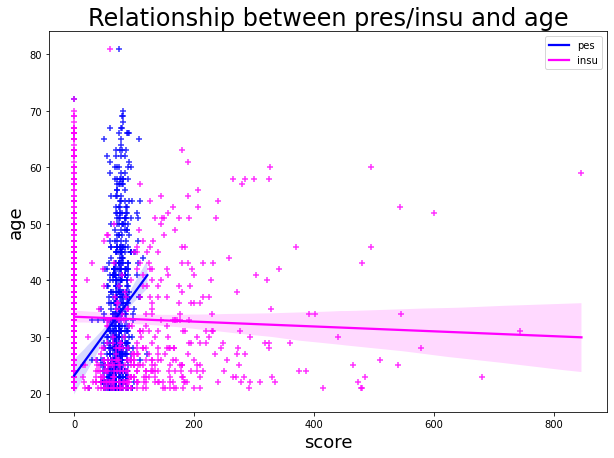

In [8]:
# _FILL_IN_YOUR_CODE_HERE 

import bokeh.io, bokeh.plotting
bokeh.io.output_notebook()
import seaborn as sns


df = pd.read_csv('diabetes.csv')

diabetes = df
print(diabetes)


diabetes.describe(include='all')

diabetes_dane = pd.DataFrame(diabetes,columns=['pres','insu','mass','age'])
diabetes_dane = diabetes_dane.dropna()


# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=diabetes_dane['pres'], y=diabetes['age'], color='blue', marker='+')
sns.regplot(x=diabetes_dane['insu'], y=diabetes['age'], color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['pes', 'insu'])
plt.title('Relationship between pres/insu and age', size=24)
plt.xlabel('score', size=18)
plt.ylabel('age', size=18);









### Logistic Regression

Do you remember regression from previous classes? It is the simplest model for predicting a continuous variable.  
What if, instead of reading a particular value from a line, we wanted to check if a point is on one side or the other of that line? We get a simple method for classifying binary variables!

See the simple image below to get the overall idea. Two classes are represented by different colors.

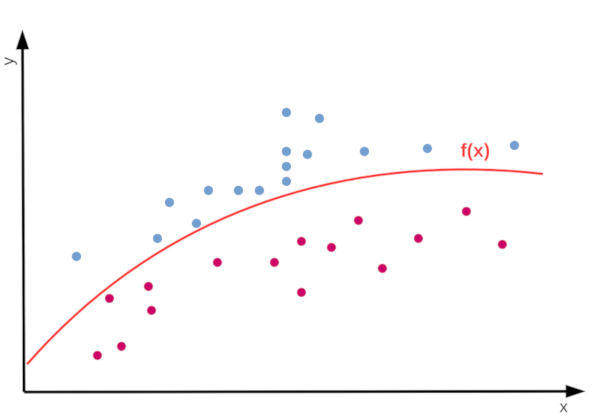

Instead of using a linear function, we will use a logistic function, which has the property of predicting the transition from a value of 0 to a value of 1 and, additionally, it does so with a smooth boundary, which is ideal for creating models that distinguish between two values:

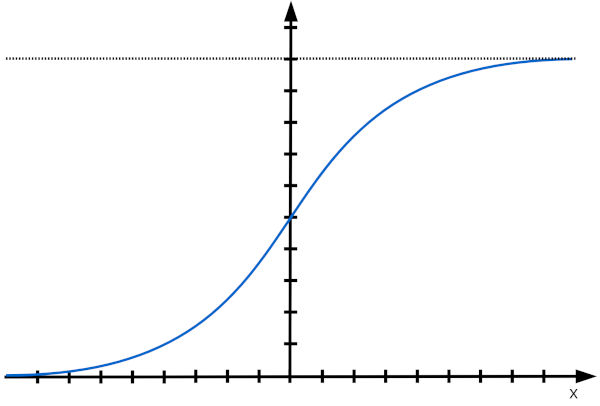

During model learning, we will seek appropriate function parameters and a cutoff threshold separating the two classes (this may be something other than 0.5).

If you want to know more, you can start, e.g., from [here](shttps://towardsdatascience.com/introduction-to-logistic-regression-66248243c148s).

### Preprocessing



Some machine learning models are sensitive to data of different orders of magnitude - in this situation, it is best to scale all data so that features with larger values do not "overwhelm" those with smaller values.

Scikit-learn has the appropriate classes to help you perform such steps. Like most Scikit-learn components, they implement the same interface based on two main functions:
* `fit()` -- adjust model parameters to the data (e.g., calculate the means and std deviations for each attribute)
* `transform()` -- do the actual transformation (e.g., scale the data)

**Task 2:** Now, use the [`preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to perform the scalling!

*Note 1:* there are `all_features` and `target` variables prepared for you. You can use them during this lab, when you want to use the features (the X matrix) or class (the Y vector), e.g., `diabetes[all_features]` is the matrix with all features, while `diabetes[target]` is the corresponding class vector.

*Note 2:* as the class is the string variable, there is no possibility to scale it. But you already know, how to get only the features (see *Note 1* ;) )


In [26]:
all_features = ['preg','plas','pres','skin','insu','mass','pedi','rhr','age']
target = 'class'
scaler = preprocessing.StandardScaler()
# _FILL_IN_YOUR_CODE_HERE 
diabetes[all_features] =  scaler.fit_transform(diabetes[all_features])

print(diabetes[all_features])



         preg      plas      pres      skin      insu      mass      pedi  \
0    0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1   -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2    1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3   -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4   -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.827813 -0.622642  0.356432  1.722735  0.870031  0.115169 -0.908682   
764 -0.547919  0.034598  0.046245  0.405445 -0.692891  0.610154 -0.398282   
765  0.342981  0.003301  0.149641  0.154533  0.279594 -0.735190 -0.685193   
766 -0.844885  0.159787 -0.470732 -1.288212 -0.692891 -0.240205 -0.371101   
767 -0.844885 -0.873019  0.046245  0.656358 -0.692891 -0.202129 -0.473785   

          rhr       age  
0    0.107069  1.425995  
1   -0.234965 -0.190672

The second important step required by some algorithms (including logistic regression) is to convert all variables to numeric values. In order to do this, we can use the [`preprocessing.LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), which will assign an integer to each value of the variable.

**Task 3:** use LabelEncoder to transform `class` values in diabetes dataset.

*Note:* you can use the `LabelEncoder` instance returned by `fit()`, not only to transform the values from string to int, but also to do the inverse procedure - simply use the [`LabelEncoder.inverse_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.inverse_transform) function.

In [27]:
from pandas.core.arrays.datetimelike import TimelikeOpsT
# _FILL_IN_YOUR_CODE_HERE 
le = preprocessing.LabelEncoder()


print(diabetes[target])
le = le.fit(diabetes[target])

#print(diabetes[target])
#print(le)
#print(le.classes_)
#print(le.inverse_transform(target))
print(diabetes[target])
diabetes[target] = le.fit_transform(diabetes[target])
print(diabetes[target])

test = le.inverse_transform(diabetes[target])
#print(test)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 

### Let's fit the model

**Task 4:** Split the diabetes dataset into a training part (67%) and a test part (33%), as in the Regression notebook.

In [28]:
# _FILL_IN_YOUR_CODE_HERE 
diabetes_train, diabetes_test = model_selection.train_test_split(diabetes,test_size=0.33, train_size=0.67)

The actual model will be trained after running the cell below - as in the Regression, in the minimal version, just select the model and the appropriate datasets. Of course the model has many parameters that can be **(and should be)** tuned, see [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [35]:
# select the model (and optional parameters)
regr_model = linear_model.LogisticRegression()

# fit the model to the data
regr_model.fit(diabetes_train[all_features], diabetes_train[target])

# if you want to see the actual parameters, you can print the following line
print(regr_model.coef_, regr_model.intercept_)




#x_range = 80
#Xs = [i for i in range(x_range)]
#Ys = [regr_model.predict_proba([[value]])[0][1] for value in range(x_range)]

#plt.scatter(diabetes_train[all_features], diabetes_train[target])
#plt.plot(Xs, Ys, color='red')

[[ 0.39398688  1.09722527 -0.3294783   0.02366065  0.08645843  0.79905365
   0.30468183  0.12080262  0.23879779]] [-0.88254778]


**Task 5:** The model has been trained, now it's time for you to evaluate its effectiveness on a test set using the [`metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

*Note:* If you want to have the correct class names in the report instead of 0 and 1, use the [`LabelEncoder.inverse_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.inverse_transform) function or `LabelEncoder.classes_` list.

In [36]:
# _FILL_IN_YOUR_CODE_HERE 

test_predict = regr_model.predict(diabetes_test[all_features])

print(metrics.classification_report(y_true=le.inverse_transform(diabetes_test[target]), y_pred=le.inverse_transform(test_predict)))

raport=metrics.classification_report(y_true=le.inverse_transform(diabetes_test[target]), y_pred=le.inverse_transform(test_predict))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       164
           1       0.66      0.58      0.62        90

    accuracy                           0.74       254
   macro avg       0.72      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



           0       0.78      0.84      0.81       164
['0', '0.78', '0.84', '0.81', '164']
[0.78, 0.84, 0.81]
           1       0.66      0.58      0.62        90
['1', '0.66', '0.58', '0.62', '90']
[0.66, 0.58, 0.62]

[]


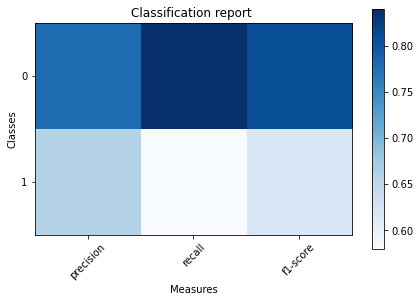

In [39]:
#x = data['balance']
#y = data['default']

#plot logistic regression curve
#sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        print(line)
        t = line.split()
        print(t)
        if(len(t)==0):
          break
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

raport=metrics.classification_report(y_true=le.inverse_transform(diabetes_test[target]), y_pred=le.inverse_transform(test_predict))

plot_classification_report(raport)




### Simple Feed Forward Neural Networks

As neural network theory is rich in [various architectures](https://www.asimovinstitute.org/neural-network-zoo/) and numerous textbooks (*I highly recommend [this online book](http://neuralnetworksanddeeplearning.com/)*), here we will focus on getting to know the general idea of how it works (there is no time to do more...).

There will be no programming tasks in this section, but you will get to play around with a tool that allows you to tune a simple neural network.

**Task 6:** Open the [http://playground.tensorflow.org/](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.3&regularizationRate=0&noise=0&networkShape=4,2&seed=0.22436&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularizationRate_hide=true&regularization_hide=true&problem_hide=true&percTrainData_hide=true&batchSize_hide=true) tool that allows you to observe the learning process of a neural network that recognizes two types (colors) of points in a two-dimensional space.
1. You can: (a) change the activation function, the number of hidden layers and the number of neurons in each layer, (b) choose which parameters will be available at the input (x1, x2 represent coordinates), (c) add noise, which will make the data less structured and thus more difficult to discriminate.
2. For each of the 4 available datasets, try to train a neural network that has **NO hidden layers** (i.e., you will train *exactly one neuron*, a building block of neural networks). Try different combinations of input parameters. For which set did it fail? Why?
3. Build a network that has more hidden layers (the tool allows 6 layers). How many layers are fine? How many neurons should be in each layer?
4. Experiment with different settings, observe what patterns the neurons of the hidden layers learn (you can hover the cursor over a given neuron and then its pattern is enlarged) and try to create a neural network that best classifies **the points arranged in a spiral**.

**Response (for Task 6):** `#_FILL_IN_YOUR_RESPONSE_HERE`

In [40]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = #
        self.weights2   = #             
        self.y          = y
        self.output     = #

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
  #https://machinelearningmastery.com/the-chain-rule-of-calculus-for-univariate-and-multivariate-functions/#:~:text=The%20chain%20rule%20allows%20us,to%20train%20feedforward%20neural%20networks.
    def backprop(self):
        
        # aplikuje chain rule - zeby znalezc pochodna funkcji zlozonej - funkcji utraty z zachowaniem
        # weights2 i weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # aktualizuje wagi przez pochodna funkcji utraty
        self.weights1 += d_weights1
        self.weights2 += d_weights2


if __name__ == "__main__":


  
  X=diabetes[all_features].values
  y = diabetes[target].values

    nn = NeuralNetwork(X,y)

    for i in range(1500):
        nn.feedforward()
        nn.backprop()

    print(nn.output)

SyntaxError: ignored

## Advanced Classification

*This part of the notebook presents more advanced topics and is optional.*

### Decision Trees

The second interesting classification model we want to explore today is Decision Trees. In Python, the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_(CART)) algorithm is used as a base for (almost?) all machine learning libraries.

There are several advantages of decision trees:
* They do not require attributes normalization (no need for `StandardScaler`).
* They work on symbolic, numeric and mixed data (no need for `LabelEncoder`).
* Can handle missing data without unnecessary manipulation of the data.
* Are interpretable -- the model is self-explanatory.
* Can be used for many tasks: classification, regression, and even clustering.

The two biggest drawbacks are:
* high sensitivity to data perturbations if parameters are chosen inappropriately,
* decision boundaries located parallel to the axes (because decisions are made on the basis of one parameter in each step).

Each tree node in the visualizations which will be generated below looks as follows:

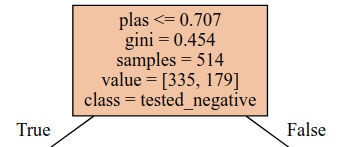

Where:
* `samples` indicates how many rows from the dataset were "included" in this node during the tree learning process (e.g., all 514 rows were used in the first node presented above),
* `value` provides details by indicating the number of instances of each class (e.g., 335 instances of class 0/negative and 179 instances of class 1/positive),
* `class` indicates the decision that would be made if the current node were a leaf (e.g., negative as above, because there are more negative samples than positive ones in this node); the decision is also indicated by colour (red and blue for two classes),
* `gini` is a metric that calculates how good discrimination between classes occurs at the current node (0 is the best). This metric is also used for decision selection - parameters and their values are chosen such that in the next level of the tree the `gini` values are as low as possible (e.g., in this node there are many instances of both classes - as a result, it is not so good discriminator, what is indicated by high `gini` value),
* The first row contains the `decision` being made at that node in the tree. Based on the answer, we then traverse the corresponding edges to the subsequent nodes until we reach the leaves, where the classification according to the `class` value is returned (e.g., in the example, we check whether the `plas` value is `<= 0.707` or not).

### Decision Tree generation

In [41]:
# trees in sklearn
from sklearn import tree

# for trees visualisation
!pip install graphviz
!apt-get -qq install -y graphviz
from sklearn.tree import  export_graphviz
from IPython.display import display, SVG
from graphviz import Source

Decision tree generation follows the same workflow as Linear Regression (last time) and Logistic Regression (above). We select the model, set the parameters, and fit the model to the data.

All is done below. Also, there is a code for visualisation.

Note: if you want to see class labels instead of numeric values, use the `LabelEncoder.classes_` list as a value for `class_names` parameter in `export_graphviz()` function.

In [44]:
# select the model (and optional parameters)
tree_model = tree.DecisionTreeClassifier(max_depth=2)
# fit the model to the data
tree_model.fit(diabetes_train[all_features], diabetes_train[target])

# visualisation
graph = Source(tree.export_graphviz(tree_model, out_file=None, 
                                    feature_names=all_features,
                                    class_names=le.classes_,
                                    filled = True))

display(SVG(graph.pipe(format='svg')))


TypeError: ignored

**Task 7:** Evaluate the decision tree using the [`metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) (as with Logistic Regression).

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 




The following parameters are particularly important for the construction of a tree and protects against overfitting (for the full list, see the docs at [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)): 
* `max_depth` - the maximum depth of the tree,
* `min_samples_split` - minimum number of elements that allow splitting,
* `min_samples_leaf` - minimum number of elements to become a leaf (complementary to the previous one).

**Task 8:** Try out various values of these parameters and show below the best tree you have prepared!

In [ ]:
# _FILL_IN_YOUR_CODE_HERE 